In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df = pd.read_csv('data/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
df.drop(columns=['lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_above'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,98178
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0,98125
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN,98028
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,1965,0.0,98136
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,2009,0.0,98103
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,2014,0.0,98146
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,2009,0.0,98144
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,0.0,2004,0.0,98027


<AxesSubplot:>

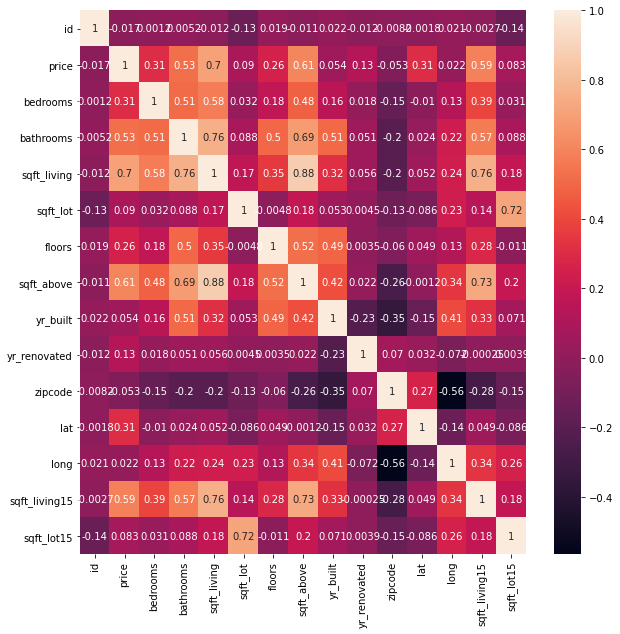

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [15]:
df.sort_values(['price'], ascending = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,NO,NONE,...,5 Fair,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,NONE,...,4 Low,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,NONE,...,5 Fair,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,NO,NONE,...,6 Low Average,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,NO,NONE,...,5 Fair,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [17]:
df['price'].median()

450000.0

In [23]:
relevant_columns = df[['price', 'bedrooms', 'bathrooms', 'grade', 'sqft_lot']]

<AxesSubplot:>

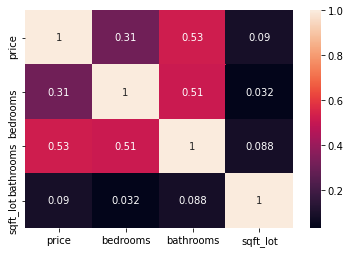

In [24]:
sns.heatmap(relevant_columns.corr(), annot=True)

In [33]:
df[['zipcode', 'price']].sort_values('price', ascending=False)

,zipcode,price
7245,98102,7700000.0
3910,98004,7060000.0
9245,98039,6890000.0
4407,98039,5570000.0
1446,98004,5350000.0
...,...,...
2139,98168,82500.0
8267,98146,82000.0
16184,98168,81000.0
465,98014,80000.0
